# For user 5829 you can run xgb model to predict movie list

# For other users they don't have enough data

In [ ]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import re
import matplotlib.pyplot as plt
          
import operator

In [4]:
import numpy as np

In [5]:
pd.set_option('display.max_columns', 100)

In [8]:
ratings =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings.csv")

In [10]:
mlrcv_sm =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\mlrcv_sm0.3_dummy.csv", index_col=0)

In [80]:
mlrcv_sm.head(1)

,movieId,budget,runtime,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,cast_Adam Driver,cast_Adam Greaves-Neal,cast_Adam Lundgren,cast_Adam Mayfield,cast_Adam Pally,cast_Adam Paroussos,cast_Adam Roarke,...,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
44823,174705,0.0,90.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


In [10]:
ratings.shape

(26024289, 4)

# Check users

In [19]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529


In [11]:
ratings1 = ratings[(ratings['userId'] ==1)]

In [12]:
ratings5829 = ratings[(ratings['userId'] ==5829)]

In [13]:
ratings5829.to_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings5829.csv")

In [78]:
ratings9173 = ratings[(ratings['userId'] ==9173)]

################################

# Attempt 2

################################

In [79]:
mlrcv_sm.head(1)

,movieId,budget,runtime,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,cast_Adam Driver,cast_Adam Greaves-Neal,cast_Adam Lundgren,cast_Adam Mayfield,cast_Adam Pally,cast_Adam Paroussos,cast_Adam Roarke,...,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
44823,174705,0.0,90.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


In [21]:
# Drop vars that are not needed
# Dropping rating here
mlrcv_sm = mlrcv_sm.drop(mlrcv_sm.columns[[1, 2, 3, 6, 7, 8, 9]], axis=1)
mlrcv_sm.head(1)

,movieId,budget,runtime,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,cast_Adam Driver,cast_Adam Greaves-Neal,cast_Adam Lundgren,cast_Adam Mayfield,cast_Adam Pally,cast_Adam Paroussos,cast_Adam Roarke,...,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
44823,174705,0.0,90.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


In [18]:
ratings5829.head(1)

,userId,movieId,rating,timestamp
574089,5829,1,2.5,1442164418


####################################

# Merge with the right user data

####################################

In [85]:
u5829 = mlrcv_sm.merge(ratings5829[['movieId', 'rating']], how='inner', on='movieId')
u5829.head(5)

,movieId,budget,runtime,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,cast_Adam Driver,cast_Adam Greaves-Neal,cast_Adam Lundgren,cast_Adam Mayfield,cast_Adam Pally,cast_Adam Paroussos,cast_Adam Roarke,...,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,rating
0,1586,50000000.0,125.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
1,147384,0.0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2.0
2,1299,14400000.0,141.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,4.0
3,2366,672000.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.5
4,106002,110000000.0,114.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0


In [86]:
u5829.shape

(860, 15682)

In [24]:
# Drop vars that are not needed
# Dropping rating here
u5829 = u5829.drop(u5829.columns[[0]], axis=1)
u5829.head(1)

,budget,runtime,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,cast_Adam Driver,cast_Adam Greaves-Neal,cast_Adam Lundgren,cast_Adam Mayfield,cast_Adam Pally,cast_Adam Paroussos,cast_Adam Roarke,cast_Adam Roque,...,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,rating
0,50000000.0,125.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0


# XGB Model 6 - User 5829

In [25]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [26]:
# divide data into labels and attributes
X = u5829.drop('rating', axis=1)
y = u5829['rating']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
xgb_model6 = xgb.XGBRegressor(objective="reg:linear", n_estimators=30, colsample_bytree=0.7, subsample=0.7, max_depth=5, random_state=42)
xgb_model6.fit(X_train, y_train)
xgb_model6

[15:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=30, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
y_pred = xgb_model6.predict(X_test)

In [30]:
compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
145,4.0,3.092288
204,2.0,2.816847
271,3.5,3.044443
258,3.5,2.816719
530,0.5,3.127108
...,...,...
717,3.5,2.998940
156,2.5,2.705548
200,3.5,3.723781
625,4.0,3.829628


In [31]:
# Evaluating the XGBoost regression model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6443725727325262
Mean Squared Error: 0.6805636571158233
Root Mean Squared Error: 0.8249628216567237


In [32]:
# Evaluating the XGBoost regression model_training dataset
y_pred_train = xgb_model6.predict(X_train)

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 0.4407430445385534
Mean Squared Error: 0.2829495259902708
Root Mean Squared Error: 0.5319300010248255


In [34]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance6 = xgb_model6.feature_importances_

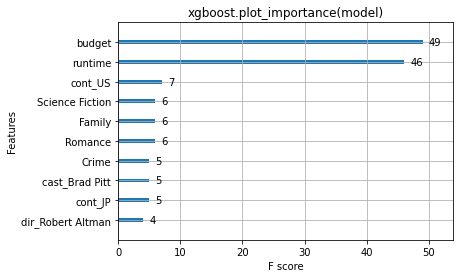

In [35]:
# ”weight” is the number of times a feature appears in a tree
import matplotlib.pylab as pl
xgb.plot_importance(xgb_model6, max_num_features=10, importance_type="weight")
pl.title("xgboost.plot_importance(model)")
pl.show()

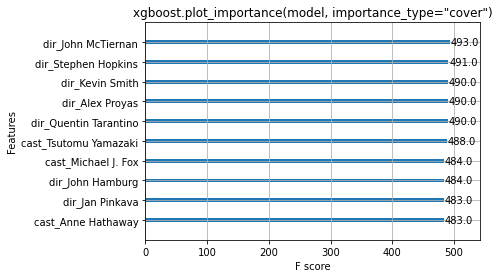

In [36]:
# ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
xgb.plot_importance(xgb_model6, max_num_features=10, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

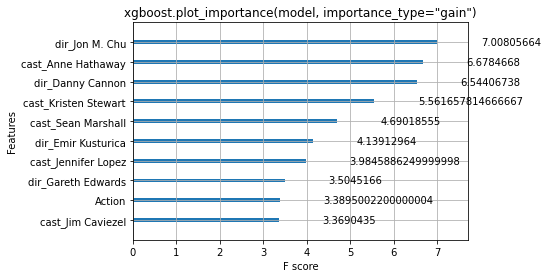

In [37]:
# ”gain” is the average gain of splits which use the feature
xgb.plot_importance(xgb_model6, max_num_features=10, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [38]:
import shap

In [39]:
# print the JS visualization code to the notebook
shap.initjs()

In [40]:
explainer = shap.TreeExplainer(xgb_model6)
shap_values = explainer.shap_values(X)

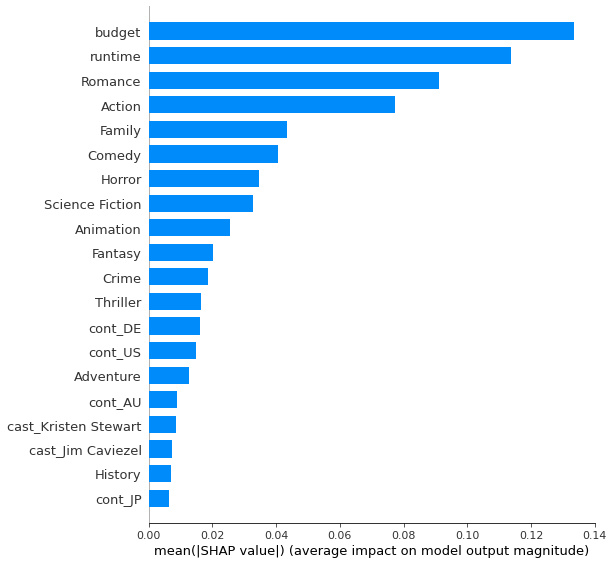

In [41]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

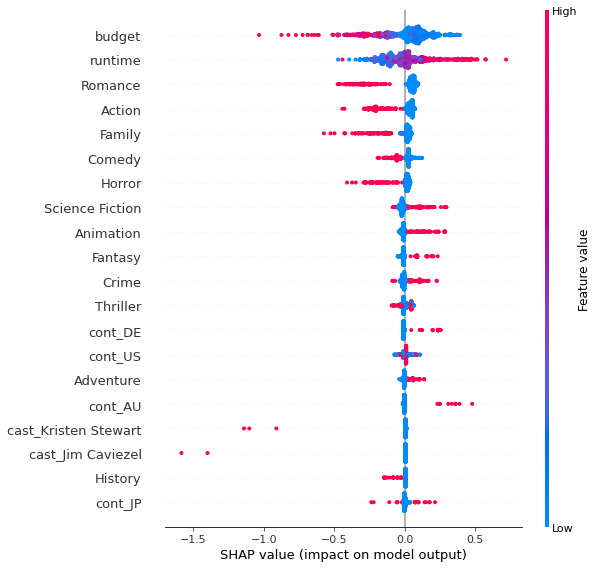

In [42]:
shap.summary_plot(shap_values, X)

# PREDICT

# Using the 0.3 sample created in D or C 3

In [44]:
mlrcv_sm2 =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\mlrcv_sm0.3_dummy.csv", index_col=0)

In [45]:
mlrcv_sm2.head(1)

,movieId,original_title,genres,country,budget,runtime,director1,name,rating,vote_average,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,...,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
44823,174705,Night Skies,"Drama, Horror, Mystery, Science Fiction, Thriller",US,0.0,90.0,Roy Knyrim,Jason Connery,1.666667,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


In [46]:
mlrcv_sm2.shape

(13605, 15688)

In [47]:
common = mlrcv_sm2.merge(ratings5829, how='inner', on='movieId')
common.shape

(860, 15691)

In [48]:
mlrcv_sm2 = mlrcv_sm2[(~mlrcv_sm2.movieId.isin(common.movieId))]
mlrcv_sm2.shape

(12745, 15688)

# mlrcv_sm2 is mlrcv_sm of the ones user 5829 hasn't already rated

In [52]:
mlrcv_sm3 = mlrcv_sm2.drop(mlrcv_sm2.columns[[0, 1, 2, 3, 6, 7, 8, 9]], axis=1)
mlrcv_sm3.head(1)

,budget,runtime,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,cast_Adam Driver,cast_Adam Greaves-Neal,cast_Adam Lundgren,cast_Adam Mayfield,cast_Adam Pally,cast_Adam Paroussos,cast_Adam Roarke,cast_Adam Roque,...,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
44823,0.0,90.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0


# Predict ratings using xgb6

In [54]:
y_pred_u5829 = xgb_model6.predict(mlrcv_sm3)

In [55]:
y_pred_u5829.shape

(12745,)

In [57]:
y_pred_u5829

array([3.2533176, 2.9912026, 2.6463356, ..., 3.2734451, 2.6931078,
       3.167106 ], dtype=float32)

In [66]:
p_rate_5829 =pd.DataFrame(y_pred_u5829, columns=['pred_rate'])
p_rate_5829.head(5)

,pred_rate
0,3.253318
1,2.991203
2,2.646336
3,3.110139
4,3.075631


# Adding prediction to full list to ID title

In [67]:
pred_list = mlrcv_sm2.join(p_rate_5829)
pred_list.head(1)

,movieId,original_title,genres,country,budget,runtime,director1,name,rating,vote_average,cast_50 Cent,cast_A. Alekseev,cast_A.C. Abadie,cast_A.J. Buckley,cast_A.J. Cook,cast_AJ Michalka,cast_Aadhi,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Adams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Dean Eisenberg,cast_Aaron Eckhart,cast_Aaron Kwok,cast_Aaron Paul,cast_Aaron Poole,cast_Aaron Stanford,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,cast_Aava Merikanto,cast_Ab Abspoel,cast_Abbey Hoes,cast_Abbie Cornish,cast_Abdallah Gheith,cast_Abdelhakim Rachid,cast_Abel Ferrara,cast_Abhay Deol,cast_Abhishek Bachchan,cast_Abi Van Andel,cast_Abigail Breslin,cast_Achmed Akkabi,cast_Ada Condeescu,cast_Adam Arkin,cast_Adam Baldwin,cast_Adam Beach,cast_Adam Bousdoukos,cast_Adam Brody,cast_Adam Busch,...,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_SV,cont_TD,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_UA,cont_UG,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_WS,cont_XC,cont_XG,cont_ZA,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,pred_rate
44823,174705,Night Skies,"Drama, Horror, Mystery, Science Fiction, Thriller",US,0.0,90.0,Roy Knyrim,Jason Connery,1.666667,4.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,NaN


In [69]:
pred_list2 = pred_list[['original_title', 'movieId', 'pred_rate']]

In [70]:
pred_list2.shape

(12745, 3)

In [72]:
pred_list2.describe()

,movieId,pred_rate
count,12745.000000,3129.000000
mean,101654.485053,3.088916
std,55053.275867,0.270054
min,37.000000,2.015282
25%,62511.000000,2.947255
50%,114035.000000,3.110139
75%,147471.000000,3.252348
max,176271.000000,4.041188


In [74]:
pd.isnull(pred_list2).sum()

original_title       0
movieId              0
pred_rate         9616
dtype: int64

In [77]:
pred_list2.sort_values(by=['pred_rate'], ascending=False)

,original_title,movieId,pred_rate
5749,Elling,5890,4.041188
9776,Deus é Brasileiro,32124,4.005116
6667,The Ballad of Little Jo,6822,3.992748
6943,Dragnet,7102,3.967038
3396,Mystery Train,3521,3.940229
...,...,...,...
27173,The Fuller Brush Girl,125065,NaN
36282,寻龙诀,152292,NaN
18128,My Week with Marilyn,91134,NaN
24791,Death of a Scoundrel,116756,NaN
